### **MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms.**

### **MNIST is short for Modified National Institute of Standards and Technology database.It contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9.The dataset is already divided into training and testing sets.**

### **Kaggle JSON path**

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/'

### **API from kaggle**

In [2]:
!kaggle datasets download -d saijananim/ibm-mnist-dataset-new

 72% 11.0M/15.2M [00:00<00:00, 53.3MB/s]
100% 15.2M/15.2M [00:00<00:00, 66.8MB/s]


### **Importing the libraries**

In [1]:
pwd

'/home/wsuser/work'

In [5]:
!pip install keras==2.2.4
!pip install tensorflow==2.10.1

     |████████████████████████████████| 578.1 MB 43 kB/s /s eta 0:00:01    |█                               | 18.3 MB 8.7 MB/s eta 0:01:05                      | 22.3 MB 8.7 MB/s eta 0:01:05                      | 37.6 MB 8.7 MB/s eta 0:01:0344.5 MB 8.7 MB/s eta 0:01:02    |█████████▋                      | 173.5 MB 105.3 MB/s eta 0:00:04| 290.9 MB 124.1 MB/s eta 0:00:03:00:09��██▌     | 478.1 MB 20.6 MB/s eta 0:00:05██████▊ | 555.3 MB 131.2 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 43.7 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 73.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 95.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 53.6 MB/s eta 0:00:01
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Uninstalling absl-py-0.12.0:
      Successfully uninstalled absl-py-0.12.0
  Attempting uninstall: tensorflo

In [6]:
import pandas as pd
import numpy as np
from keras import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
%matplotlib inline
from keras.datasets import mnist    
from keras.models import Sequential  
from keras.layers.core import Dense, Dropout, Activation,Flatten 
from keras.utils import np_utils
import random 
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import SGD
import keras
import keras.utils
from keras import utils as np_utils
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing import image



2022-11-18 06:20:10.778454: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-18 06:20:10.808003: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-18 06:20:11.396634: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-18 06:20:11.396746: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could 

### **Loading the dataset from keras**

In [7]:
df=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
df

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### **Training and Testing Datasets**

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


### **Determining the Shape of the dataset**

In [9]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


### **Showing the Sample Images**

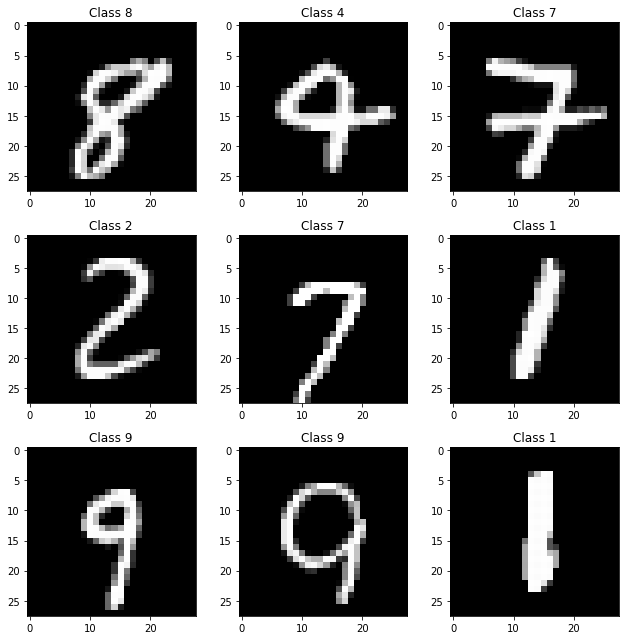

In [10]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

### **Printing the matrix**

In [11]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

   
matprint(X_train[num])

0  0  0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0    0   86  197  255  253    0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0    0  253  251  253  251    0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0    0  254  253  254  253    0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0    0  253  251  253  251    0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0    0  254  253  254  253    0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0    0  253  251  253  251    0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  

The label value is  [7 2 1 ... 4 5 6]


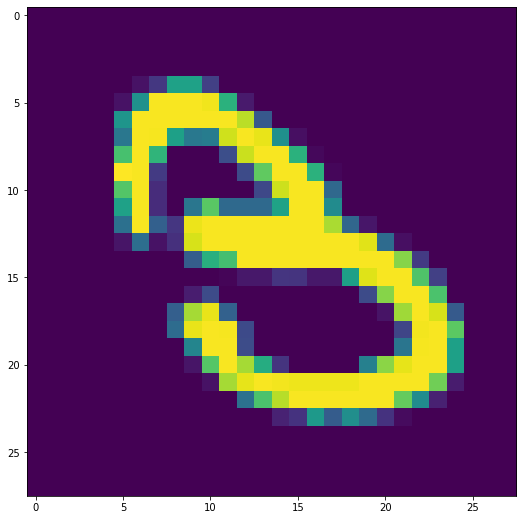

In [12]:
print("The label value is ",y_test)
plt.imshow(X_test[18])

The label value is  [7 2 1 ... 4 5 6]


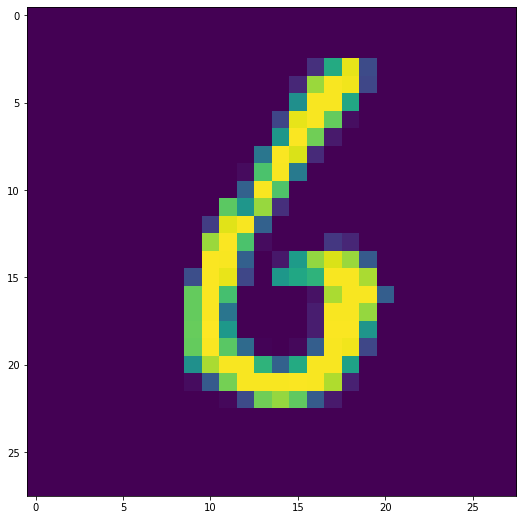

In [13]:
print("The label value is ",y_test)
plt.imshow(X_test[50])

In [14]:
input_shape=(28,28,1)
output_class=10

### **CNN Model Building**

In [15]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=input_shape ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(output_class, activation = 'softmax'))

2022-11-18 06:25:50.620057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-18 06:25:50.620118: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

## **Training the Model**

In [18]:
model_history = model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3360 - accuracy: 0.9119 - val_loss: 0.1022 - val_accuracy: 0.9696
Epoch 2/30
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1053 - accuracy: 0.9693 - val_loss: 0.0976 - val_accuracy: 0.9713
Epoch 3/30
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0842 - accuracy: 0.9754 - val_loss: 0.0848 - val_accuracy: 0.9747
Epoch 4/30
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0714 - accuracy: 0.9793 - val_loss: 0.0743 - val_accuracy: 0.9787
Epoch 5/30
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0636 - accuracy: 0.9810 - val_loss: 0.0704 - val_accuracy: 0.9800
Epoch 6/30
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0553 - accuracy: 0.9844 - val_loss: 0.0780 - val_accuracy: 0.9797
Epoch 7/30
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0514 - accuracy: 0.9856 - val_loss: 0.0651 -

## **Saving the model**

In [21]:
 model.save('Handwrittendigit.h5')

In [22]:
!tar -zcvf IBM_Trained_model.tgz Handwrittendigit.h5

Handwrittendigit.h5


In [23]:
ls

'Handwritten digit.h5'   Handwrittendigit.h5   IBM_Trained_model.tgz


In [24]:
ls -1

'Handwritten digit.h5'
Handwrittendigit.h5
IBM_Trained_model.tgz


In [25]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 17.6 MB/s eta 0:00:01


In [28]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url":"https://us-south.ml.cloud.ibm.com",
                    "apikey":"fPWXY6Xuat9fULFxeBR_jGovEaKcxDJkww5iTElQUGu7"
                 }
client = APIClient(wml_credentials)

In [29]:
client = APIClient(wml_credentials)

In [33]:
def guid_from_space_name(client, space_name):
    space= client.spaces.get_details()
    return(next(item for item in space['resources'] if item ['entity']["name"] == space_name)['metadata']['id'])

In [34]:
space_uid = guid_from_space_name(client, 'DigitRecognition')
print("Space UID = " + space_uid)

Space UID = 88d6dd09-fca2-4919-9630-8343ffb890e6


In [35]:
client.set.default_space(space_uid)

'SUCCESS'

In [36]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [56]:
sofware_spec_uid = client.software_specifications.get_id_by_name("tensorflow_2.1-py3.7")
sofware_spec_uid

'c4032338-2a40-500a-beef-b01ab2667e27'

In [ ]:
model_details =client.repository.store_model(model='IBM_Trained_model.tgz',meta_props={
client.repository.ModelMetaNames.NAME:"CNN",
client.repository.ModelMetaNames.TYPE:"keras_2.2.4",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                            )
model.id=client.repository.get_model_uid(model_details)

In [64]:
from keras.models import load_model
from keras.preprocessing import image

In [65]:
model = load_model("Handwrittendigit.h5")

In [ ]:
client.repository.download("c4032338-2a40-500a-beef-b01ab2667e27",'IBM_Trained_model.tgz')